### 1) The data (bank.csv) is related to direct marketing campaigns
(phone calls) of a Portuguese banking institution. Develop a
suitable ML model for classification. The classification goal is to
predict if the client will subscribe a term deposit. Develop models
using knn, svm, nb and logistic regression. Observe the accuracy
obtained by different models. Also study the precision, recall , F1
score parameters. Find out which algorithm is most suitable

In [1]:
import pandas as pd
import numpy as np

bank = pd.read_csv('bank.csv')
bank.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

In [2]:
print bank.columns
print bank.shape

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp_var_rate', u'cons_price_idx',
       u'cons_conf_idx', u'euribor3m', u'nr_employed', u'y'],
      dtype='object')
(41188, 21)


In [3]:
np.any(bank.isna() == True)
## data doesn't countain NaN value
[]

[]

In [4]:
enc_lab = ['job','marital','education','poutcome','default','housing','loan']

X = bank[enc_lab + ['age','campaign']]
y = bank.iloc[:,-1]
print X.shape
print y.shape

(41188, 9)
(41188,)


In [5]:
#X = X.as_matrix()

In [6]:
from sklearn.preprocessing import LabelEncoder

for lab in enc_lab :
    le = LabelEncoder()
    le.fit(X[lab])
    X[lab] = le.transform(X[lab])


print X.head()

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


   job  marital  education  poutcome  default  housing  loan  age  campaign
0    1        1          0         1        1        2     0   44         1
1    9        1          7         1        0        0     0   53         1
2    4        2          6         2        0        2     0   28         3
3    7        1          3         1        0        0     0   39         2
4    5        1          0         2        0        2     0   55         1


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=3)
svc = SVC()
logistic= LogisticRegression()
nb = GaussianNB()

X_train,X_test,y_train,y_test = train_test_split(X,y)


knn.fit(X_train,y_train)
svc.fit(X_train,y_train)
logistic.fit(X_train,y_train)
nb.fit(X_train,y_train)


models={'KNN':knn,'Logistic Reg':logistic,'NaiveBayes':nb,'SVC':svc}

#models
for i in models:
    print "-----",i,"----"
    pred = models[i].predict(X_test)
    print classification_report(y_test,pred),"\n"

----- KNN ----
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      9165
          1       0.32      0.12      0.18      1132

avg / total       0.84      0.88      0.85     10297


----- Logistic Reg ----
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      9165
          1       0.67      0.00      0.01      1132

avg / total       0.87      0.89      0.84     10297


----- SVC ----
             precision    recall  f1-score   support

          0       0.90      0.99      0.94      9165
          1       0.60      0.06      0.12      1132

avg / total       0.86      0.89      0.85     10297


----- NaiveBayes ----
             precision    recall  f1-score   support

          0       0.92      0.91      0.91      9165
          1       0.30      0.33      0.32      1132

avg / total       0.85      0.84      0.85     10297




### 2) The data (bikerentals.txt) is related to a bike rental company.
Develop a suitable ML model for predicting the number of bikes
rented (The last column of the data) daily.
(Source of data: https://github.com/mhyhre/mlcourse_open/blob/master/data/bikes_rent.csv)

In [4]:
bike_data = pd.read_csv("https://raw.githubusercontent.com/mhyhre/mlcourse_open/master/data/bikes_rent.csv")
print bike_data.head()
print bike_data.shape

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  
(731, 13)


In [5]:
from sklearn.linear_model import LinearRegression

bike_data = bike_data.as_matrix()

X = bike_data[:,:12]
y = bike_data[:,12]
X.shape

(731, 12)

In [6]:
reg_model = LinearRegression()
reg_model.fit(X,y)
p = reg_model.predict(X)

<function matplotlib.pyplot.show>

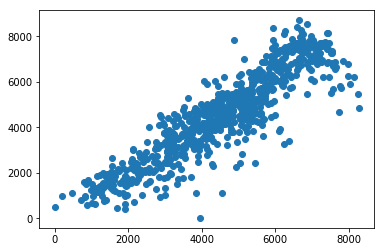

In [8]:
import matplotlib.pyplot as plt

plt.scatter(p,y)
plt.show

In [10]:
from sklearn.metrics  import mean_squared_error

print "RMSE LRG: ",mean_squared_error(y,p)**0.5

RMSE LRG:  864.507695886


RMSE SVR:  1934.71649122


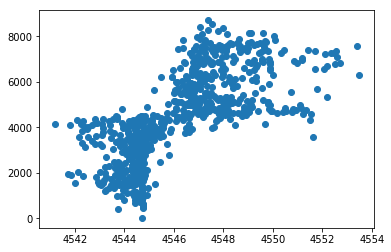

In [11]:
from sklearn.svm import SVR

reg_model2 = SVR()
reg_model2.fit(X,y)
p2 = reg_model2.predict(X)

plt.scatter(p2,y)
plt.show

print "RMSE SVR: ",mean_squared_error(y,p2)**0.5